In [37]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [38]:
# 데이터 가져오기
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [39]:
# 데이터 미리보기
print(train_data.head())
print(test_data.head())

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  
  

In [40]:
# 결측치 확인
print(train_data.isnull().sum())
print(test_data.isnull().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [41]:
# 데이터 요약하기
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [42]:
# 데이터 정보 확인
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Co

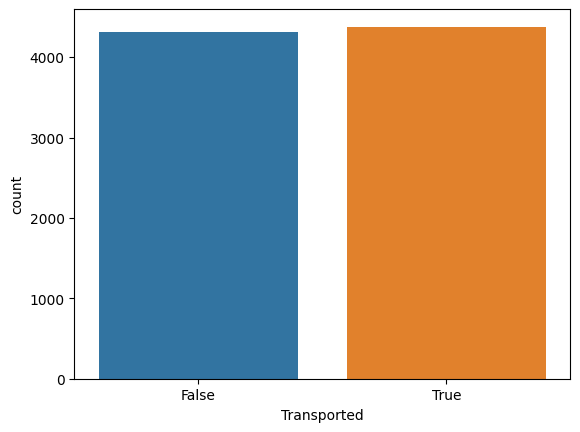

In [43]:
# 타겟 변수 분포 확인
sns.countplot(x='Transported', data=train_data)
plt.show()

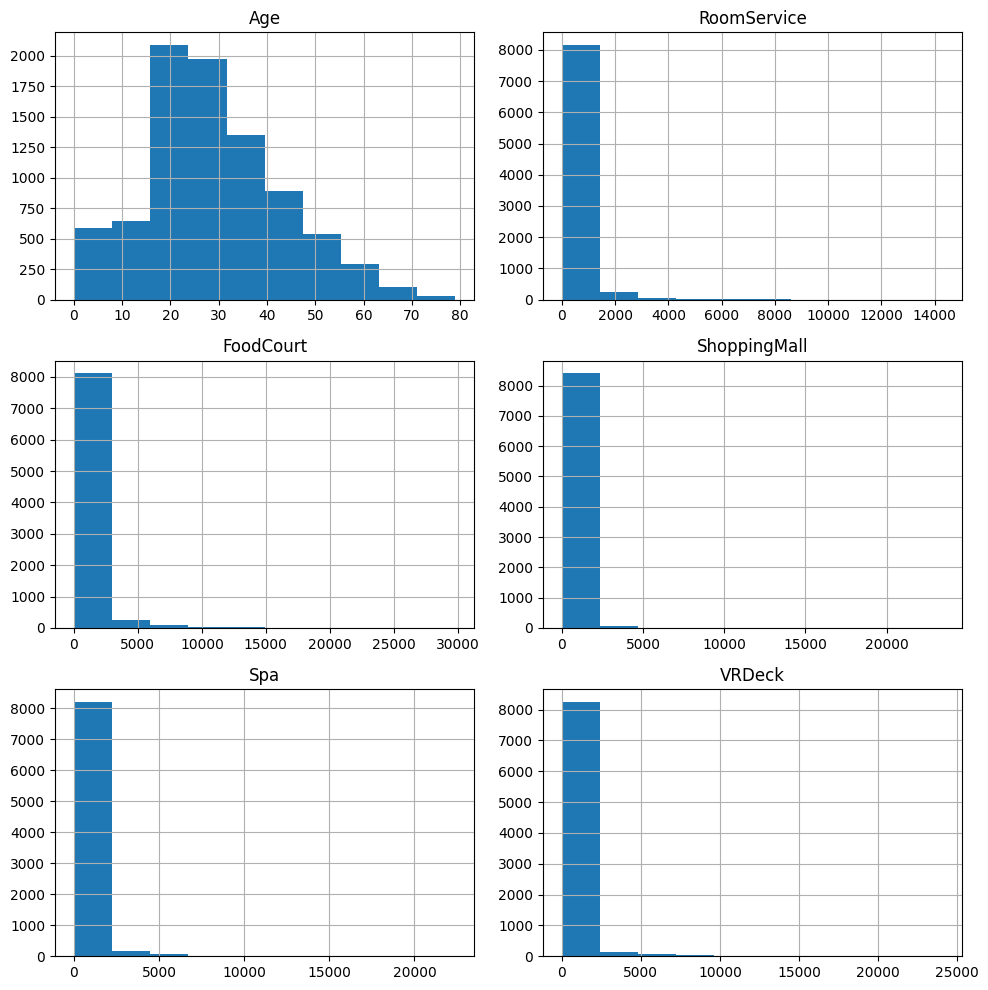

In [44]:
# 수치형 변수 분포 확인
train_data.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

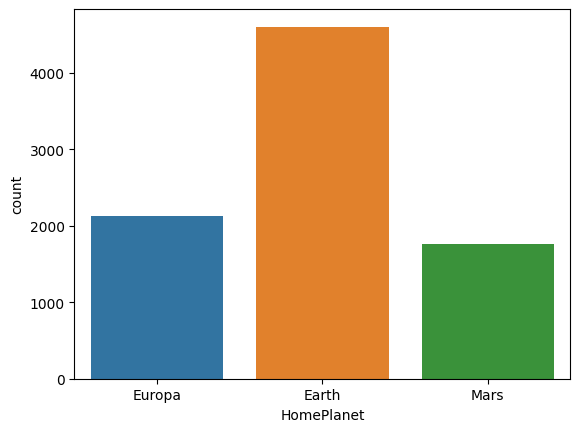

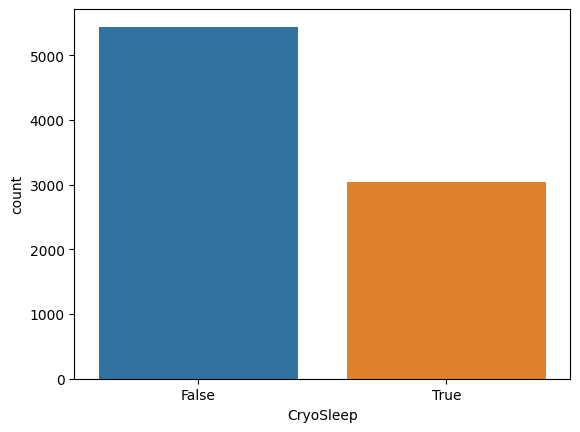

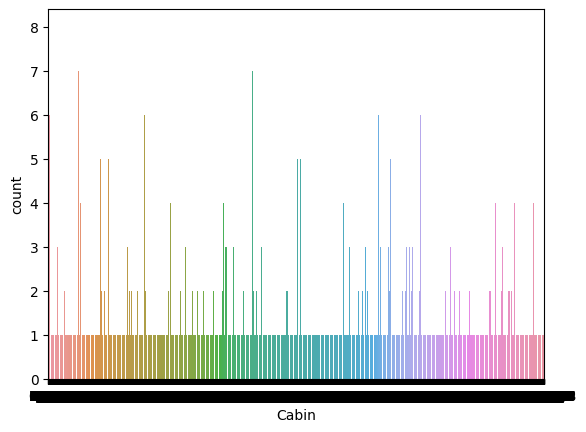

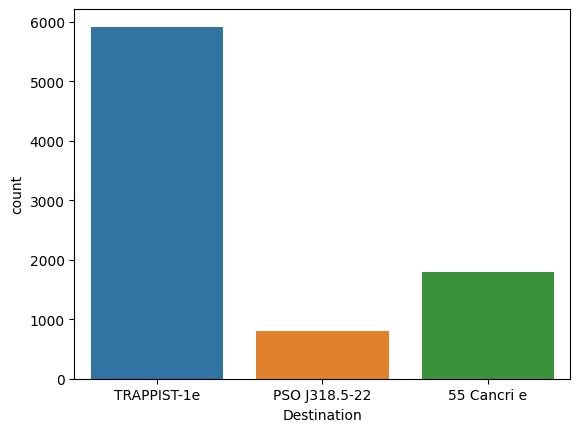

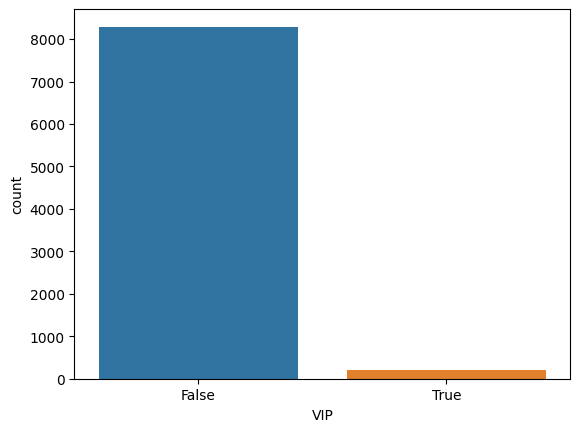

In [45]:
# 범주형 변수 분포 확인
categorical_features = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
for feature in categorical_features:
    sns.countplot(x=feature, data=train_data)
    plt.show()

In [46]:
# 훈련 데이터와 테스트 데이터 합치기
all_data = pd.concat([train_data, test_data], axis=0)

In [47]:
# 레이블 인코딩
le = LabelEncoder()
categorical_features = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
for feature in categorical_features:
    all_data[feature] = le.fit_transform(all_data[feature].astype(str))

In [51]:
# 결측치 처리
imputer = SimpleImputer(strategy='most_frequent')

train_data_without_target = train_data.drop(['Transported'], axis=1)

imputer.fit(train_data_without_target)

train_data_imputed = pd.DataFrame(imputer.transform(train_data_without_target))
test_data_imputed = pd.DataFrame(imputer.transform(test_data))

train_data_imputed.columns = train_data_without_target.columns
test_data_imputed.columns = train_data_without_target.columns

train_data_imputed['Transported'] = train_data['Transported']

In [52]:
# 'PassengerId'와 'Name' 열 제거
train_data_imputed = train_data_imputed.drop(['PassengerId', 'Name'], axis=1)
test_data_imputed = test_data_imputed.drop(['PassengerId', 'Name'], axis=1)

In [53]:
# 범주형 변수를 수치형으로 변환
ohe = OneHotEncoder(handle_unknown='ignore')

train_data_without_target_encoded = ohe.fit_transform(train_data_imputed.drop(['Transported'], axis=1))
test_data_encoded = ohe.transform(test_data_imputed)

In [55]:
# 데이터 분할
X_train = train_data_without_target_encoded
y_train = train_data_imputed['Transported']

X_test = test_data_encoded

In [56]:
# 모델 학습
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [57]:
# 예측
predictions = rf.predict(X_test)

In [58]:
# 결과 출력
print(predictions)

[ True False  True ...  True False False]
